In [1]:
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree

In [2]:
in_file_name = 'data/runs_ju.tsv'
runs = pd.read_csv(in_file_name, delimiter="\t")
runs = runs.assign(leg_id=runs.leg_nro.astype(str))
runs = runs.assign(num_runs=runs.num_runs.astype(str))
runs = runs.drop(["leg_nro", "team"], axis=1)
runs.head()

name  year  team_id team_country   pace num_runs leg_id
0  joni hirvikallio  2018        2          FIN  5.873        6      1
1  joni hirvikallio  2017       16          FIN  5.762        6      1
2  joni hirvikallio  2016      143          FIN  6.251        6      6
3  joni hirvikallio  2015       12          FIN  5.843        6      5
4  joni hirvikallio  2013       37          FIN  5.796        6      1

In [3]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76531 entries, 0 to 76530
Data columns (total 7 columns):
name            76531 non-null object
year            76531 non-null int64
team_id         76531 non-null int64
team_country    75583 non-null object
pace            76531 non-null float64
num_runs        76531 non-null object
leg_id          76531 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 4.1+ MB


In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// # To disable auto-scrolling, execute this javascript in a notebook cell before other cells are executed:

<IPython.core.display.Javascript object>

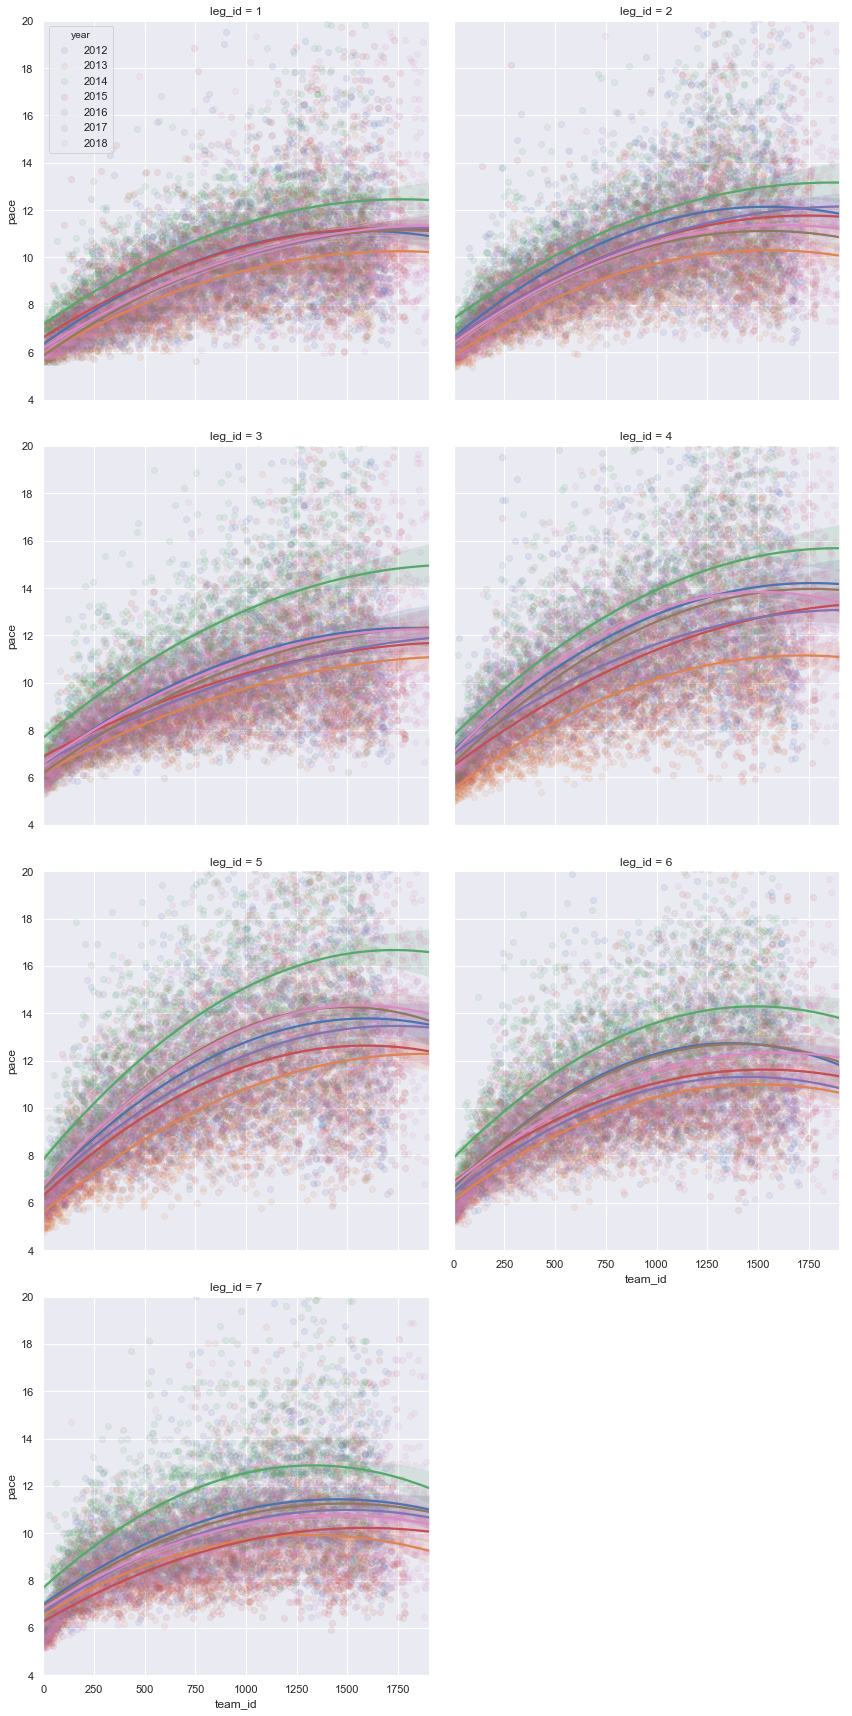

In [5]:
import seaborn as sns
sns.set(rc={})
g = sns.FacetGrid(runs, col="leg_id", hue="year", xlim=(0,runs.team_id.max()), ylim=(4,20), height=6, aspect=1, col_wrap=2, legend_out=False)
g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


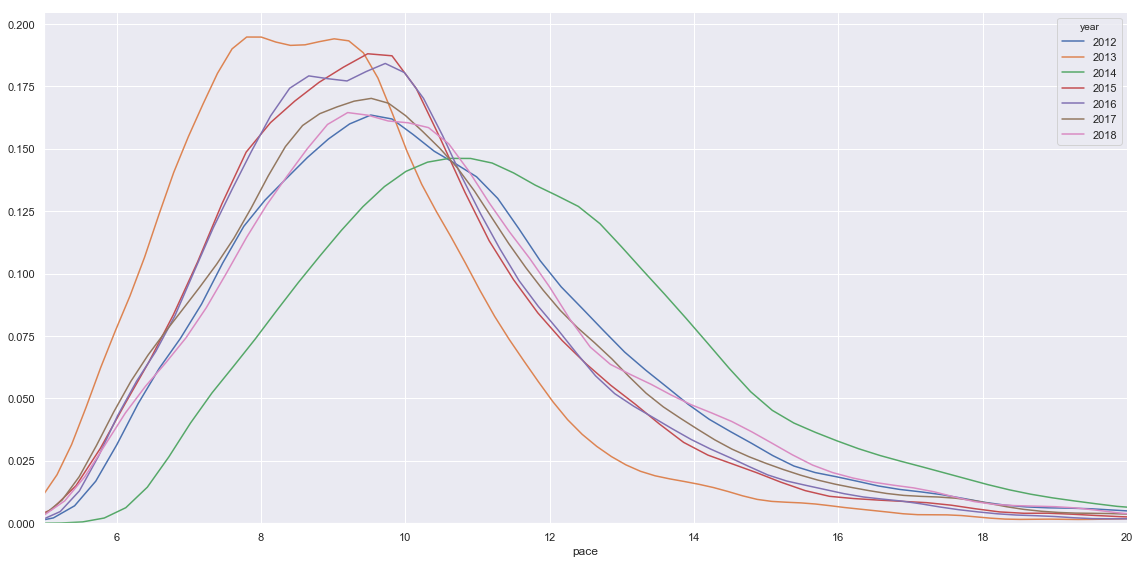

In [6]:
g = sns.FacetGrid(runs, hue="year", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()


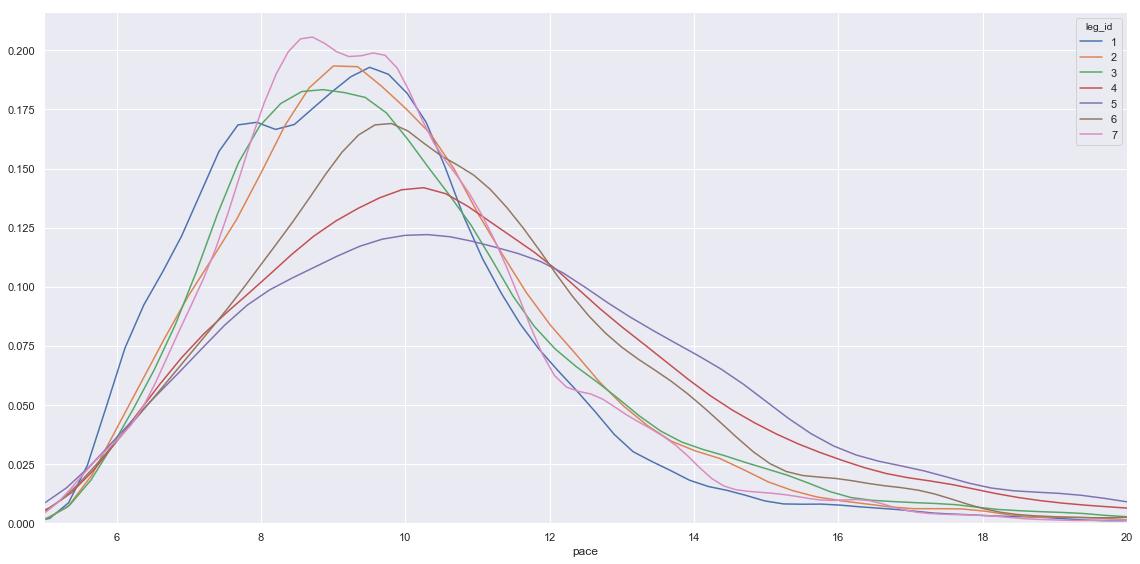

In [7]:
g = sns.FacetGrid(runs, hue="leg_id", height=8, aspect=2, xlim=(5,20), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

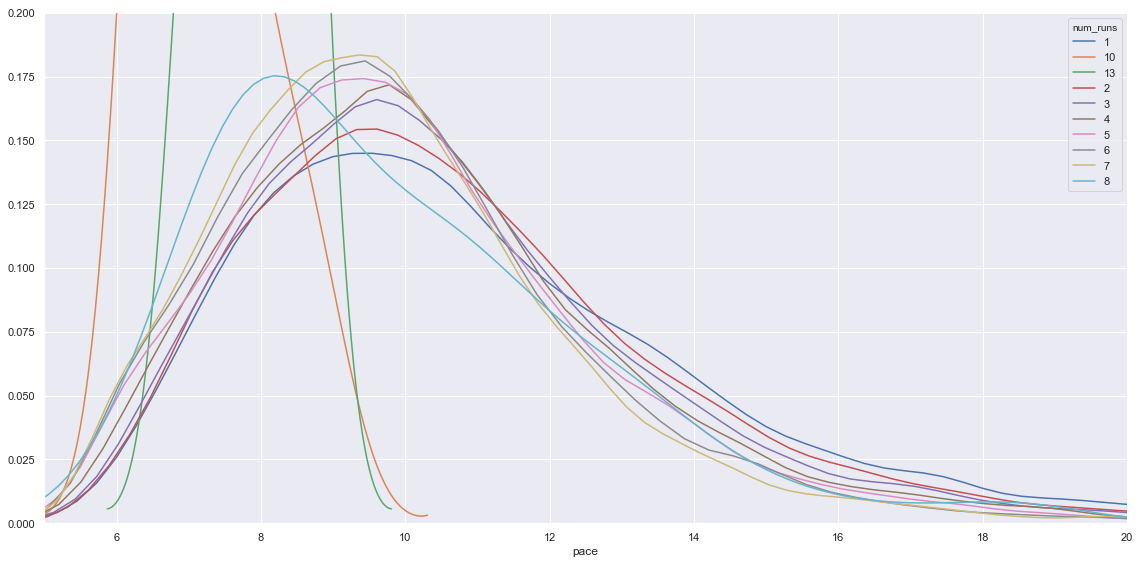

In [8]:
g = sns.FacetGrid(runs, hue="num_runs", height=8, aspect=2, xlim=(5,20), ylim=(0,0.2), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

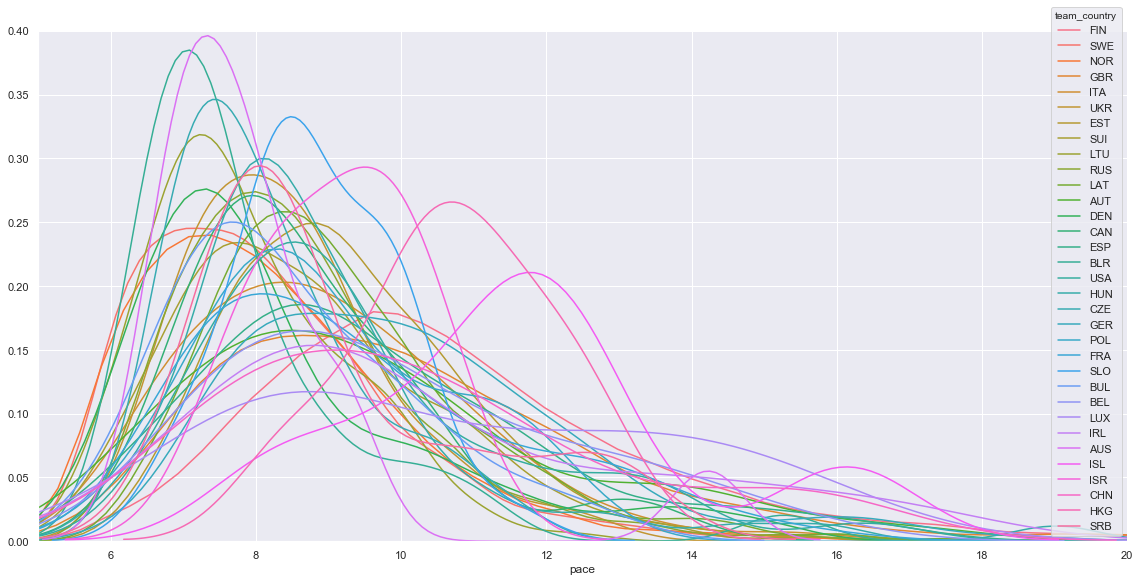

In [9]:
g = sns.FacetGrid(runs, hue="team_country", height=8, aspect=2, xlim=(5,20), ylim=(0,0.4), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

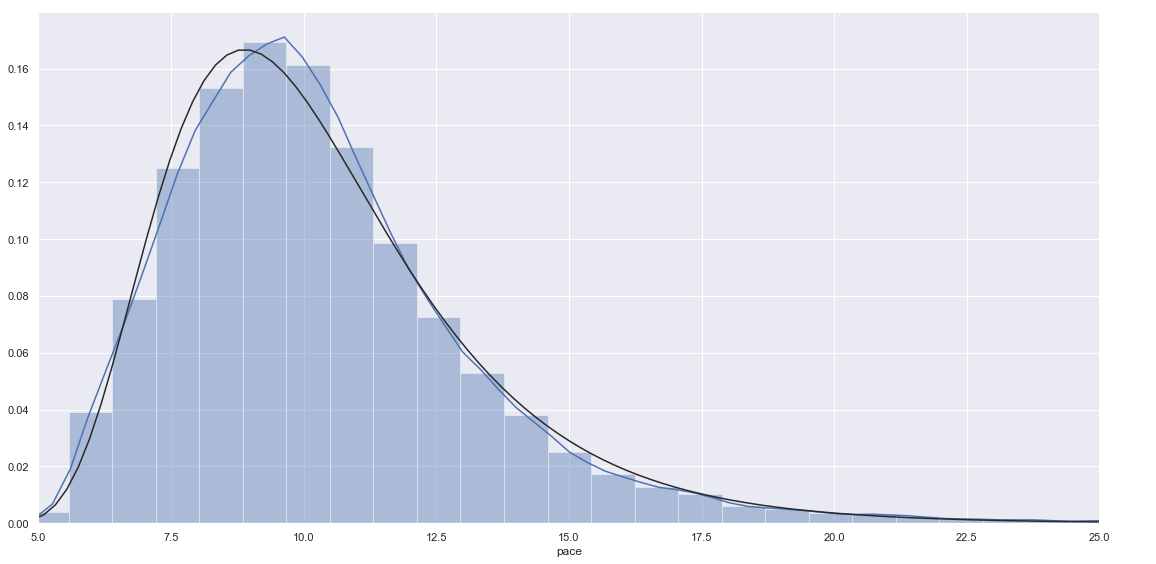

In [10]:
g = sns.FacetGrid(runs, height=8, aspect=2, xlim=(5,25), margin_titles=True) # no facet here
g.map(sns.distplot, "pace", hist=True, fit=lognorm).add_legend()

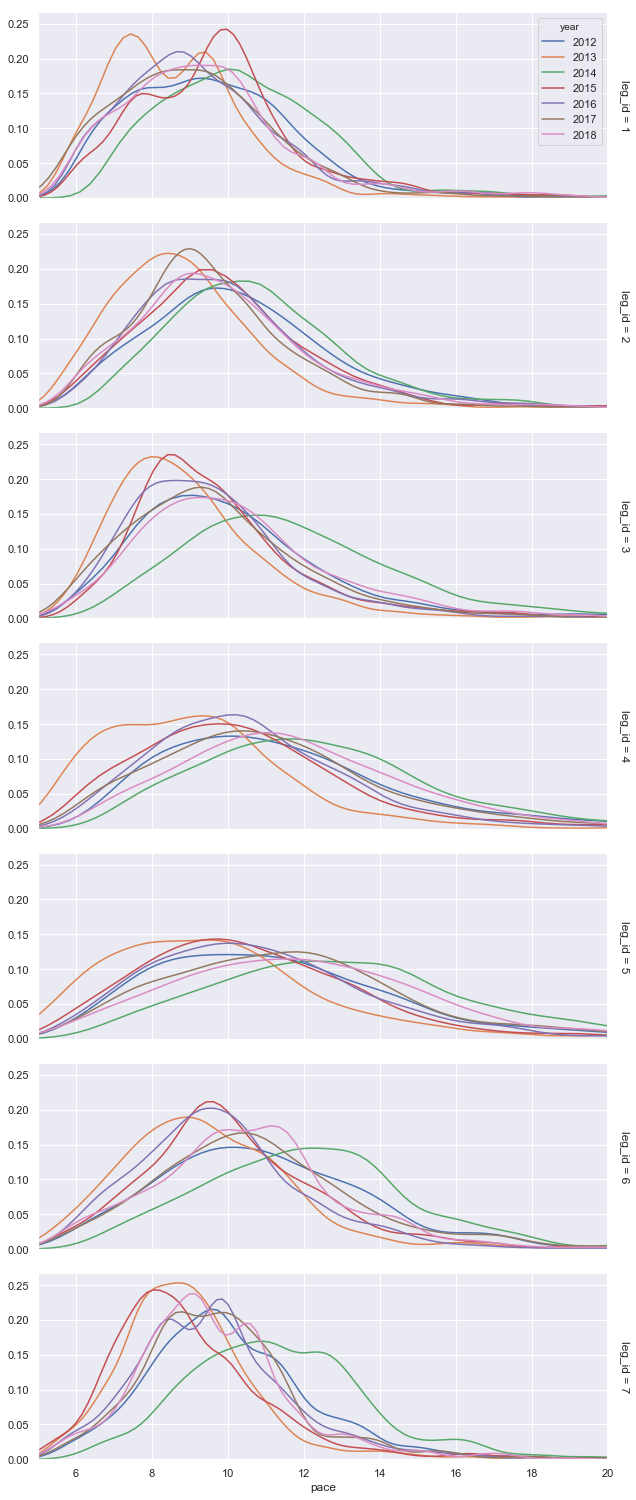

In [11]:
g = sns.FacetGrid(runs, hue="year", row="leg_id",  aspect=3, xlim=(5,20), margin_titles=True, legend_out=False)
g.map(sns.distplot, "pace", hist=False).add_legend()

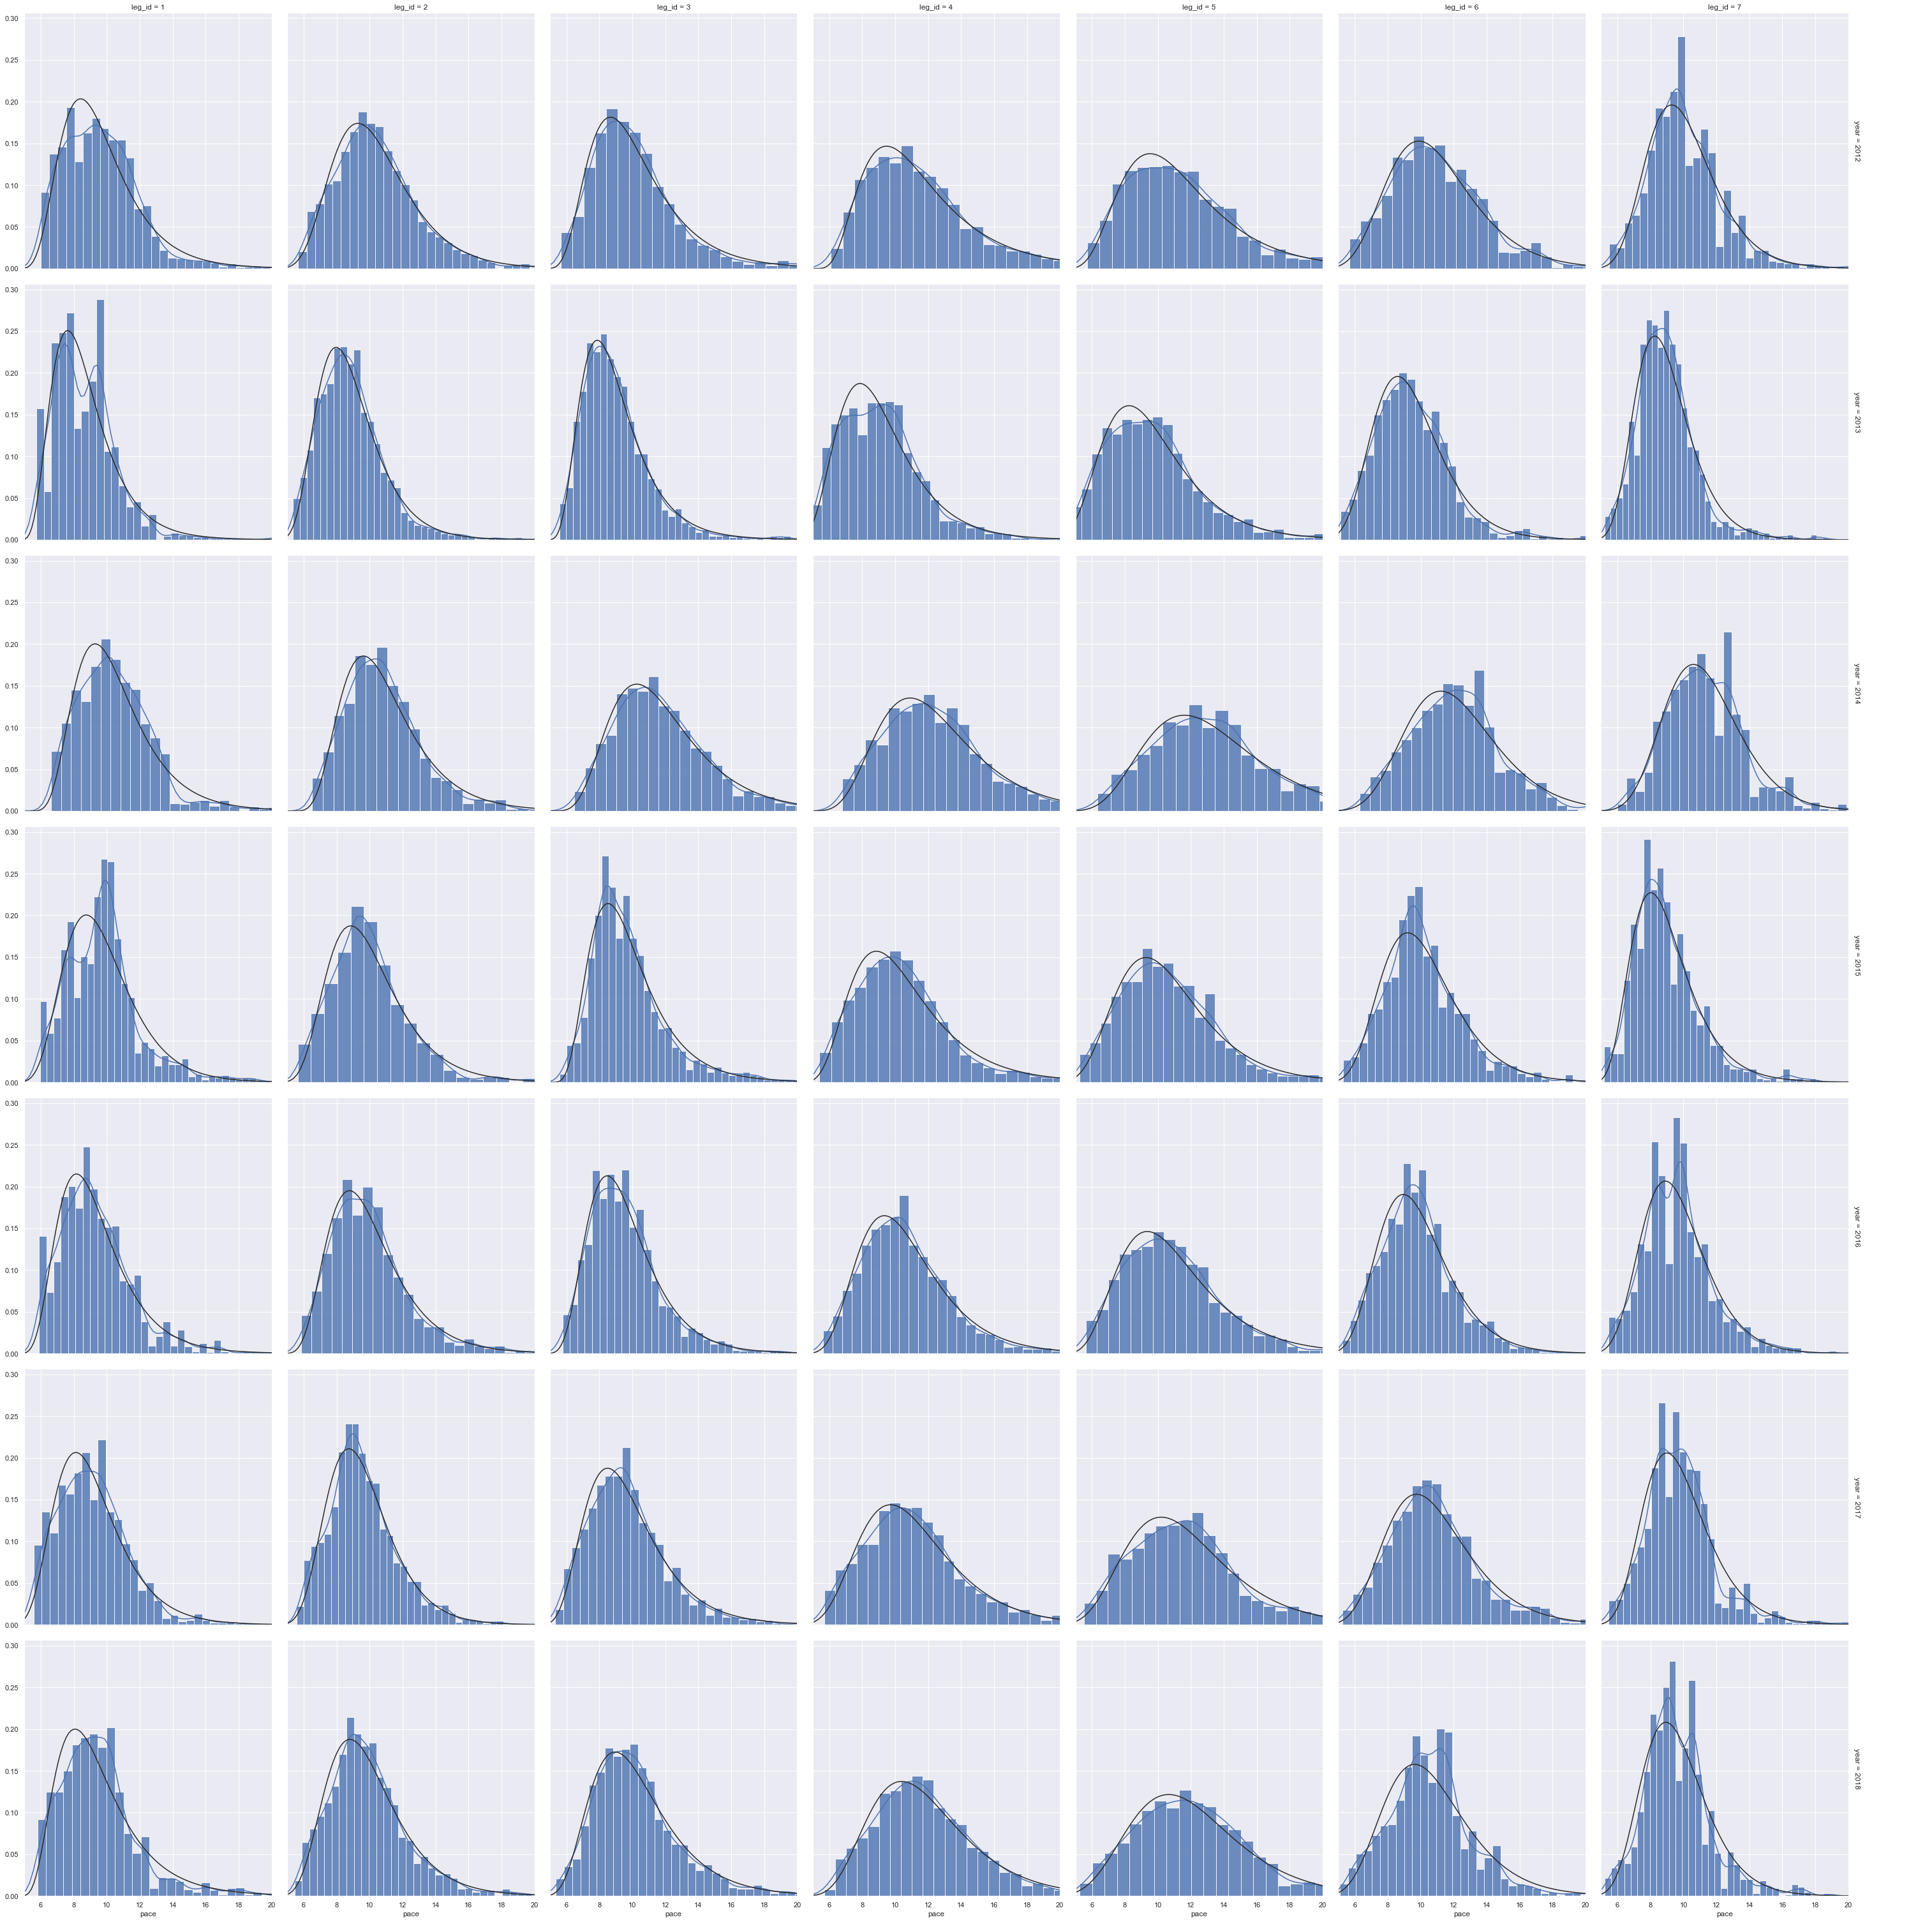

In [12]:
g = sns.FacetGrid(runs, row="year", col="leg_id", height=6, xlim=(5,20), margin_titles=True, despine=True)
g.map(sns.distplot, "pace", hist_kws={'alpha':0.8}, fit=lognorm).add_legend()

In [13]:
runs.sort_values(by="pace")

name  year  team_id team_country  \
2300                                 tue lassen  2013        7          FIN   
63609                               mats haldin  2013        3          NOR   
101                              bartosz pawlak  2013        5          SWE   
1934                                olle kärner  2013        4          FIN   
57734                             jerker lysell  2013       23          SWE   
558                              martin hubmann  2013       24          NOR   
1869                          petteri muukkonen  2013        6          FIN   
3511                            wojciech dwojak  2013       11          NOR   
1215                               olle boström  2013       15          SWE   
180                               jan prochazka  2013        1          FIN   
57833                              pekka itävuo  2013       37          FIN   
49332                           donatas stulgys  2013       20          SWE   
57987                        jonathan rosendahl  2013       59          SWE   
58201                            antti nurmonen  2013       10          FIN   
327                                mikko patana  2013        4          FIN   
57866                             ivo kamenarov  2013       33          SWE   
71939                          mathias karlsson  2013        3          NOR   
71941                            sauter philipp  2013       19          SWE   
2173                               tuomas tervo  2013       12          FIN   
288    thomas carlsson:MALUNGS OK SKOGSMÅRDARNA  2013        2          SWE   
71952                            erik sagvollen  2013       22          NOR   
270                                 emil svensk  2018       54          SWE   
74433                             tobias noborn  2013        9          SWE   
2059                             david lingfors  2013       18          SWE   
692                             nicolas simonin  2013       40          SWE   
1388                        aleksei alekseyonok  2013       41          SWE   
1451                            henrikas pauzas  2013       32          LTU   
2420                                peter öberg  2013       30          SWE   
160                               ivar lundanes  2013       27          SWE   
452                           rassmus andersson  2013       18          SWE   
...                                         ...   ...      ...          ...   
45548                             pekka heikelä  2014     1379          FIN   
44163                             risto kuronen  2018      889          FIN   
56970                              tomi taavila  2016     1299          FIN   
71078                             jukka eskanen  2014      930          FIN   
46467                            joni pakarinen  2018     1349          FIN   
45555                          pentti laaksonen  2012     1227          FIN   
44904                              herman wjuga  2017     1339          FIN   
45088                              vesa peltola  2018     1845          FIN   
62693                            tommi vienonen  2014     1360          FIN   
68272                                ari vesola  2014     1532          FIN   
76268                            oiva vaaranmaa  2012     1575          FIN   
8324              eero lehtonen:STADIN KUMMELIT  2018     1341          FIN   
76297                          pertti syvälahti  2012     1290          FIN   
76325                             merja kaskela  2012     1582          FIN   
43784                                merja rasi  2014     1366          NaN   
44721                      ari hyvönen:OC TUSKA  2018     1255          FIN   
45089                              vesa peltola  2016     1231          FIN   
71317                               juha tontti  2014     1572          FIN   
71441                                riku kokko  2012     1632          FIN   
62530         

In [14]:
runs["first_name"] = runs.name.str.split(" ", expand=True).iloc[:,0]

counts = runs["first_name"].value_counts()
top_counts = counts[counts > 20]

runs["top_first_name"] = runs["first_name"]

def top_name(first_name): 
    if first_name in top_counts:
        return first_name
    else:
        return  "NA"
    
runs["top_first_name"] = runs.apply(lambda run: top_name(run["first_name"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()
top_counts.describe()

count     452.00000
mean      143.39823
std       236.04517
min        21.00000
25%        31.00000
50%        53.50000
75%       131.00000
max      1787.00000
Name: first_name, dtype: float64

(4, 20)

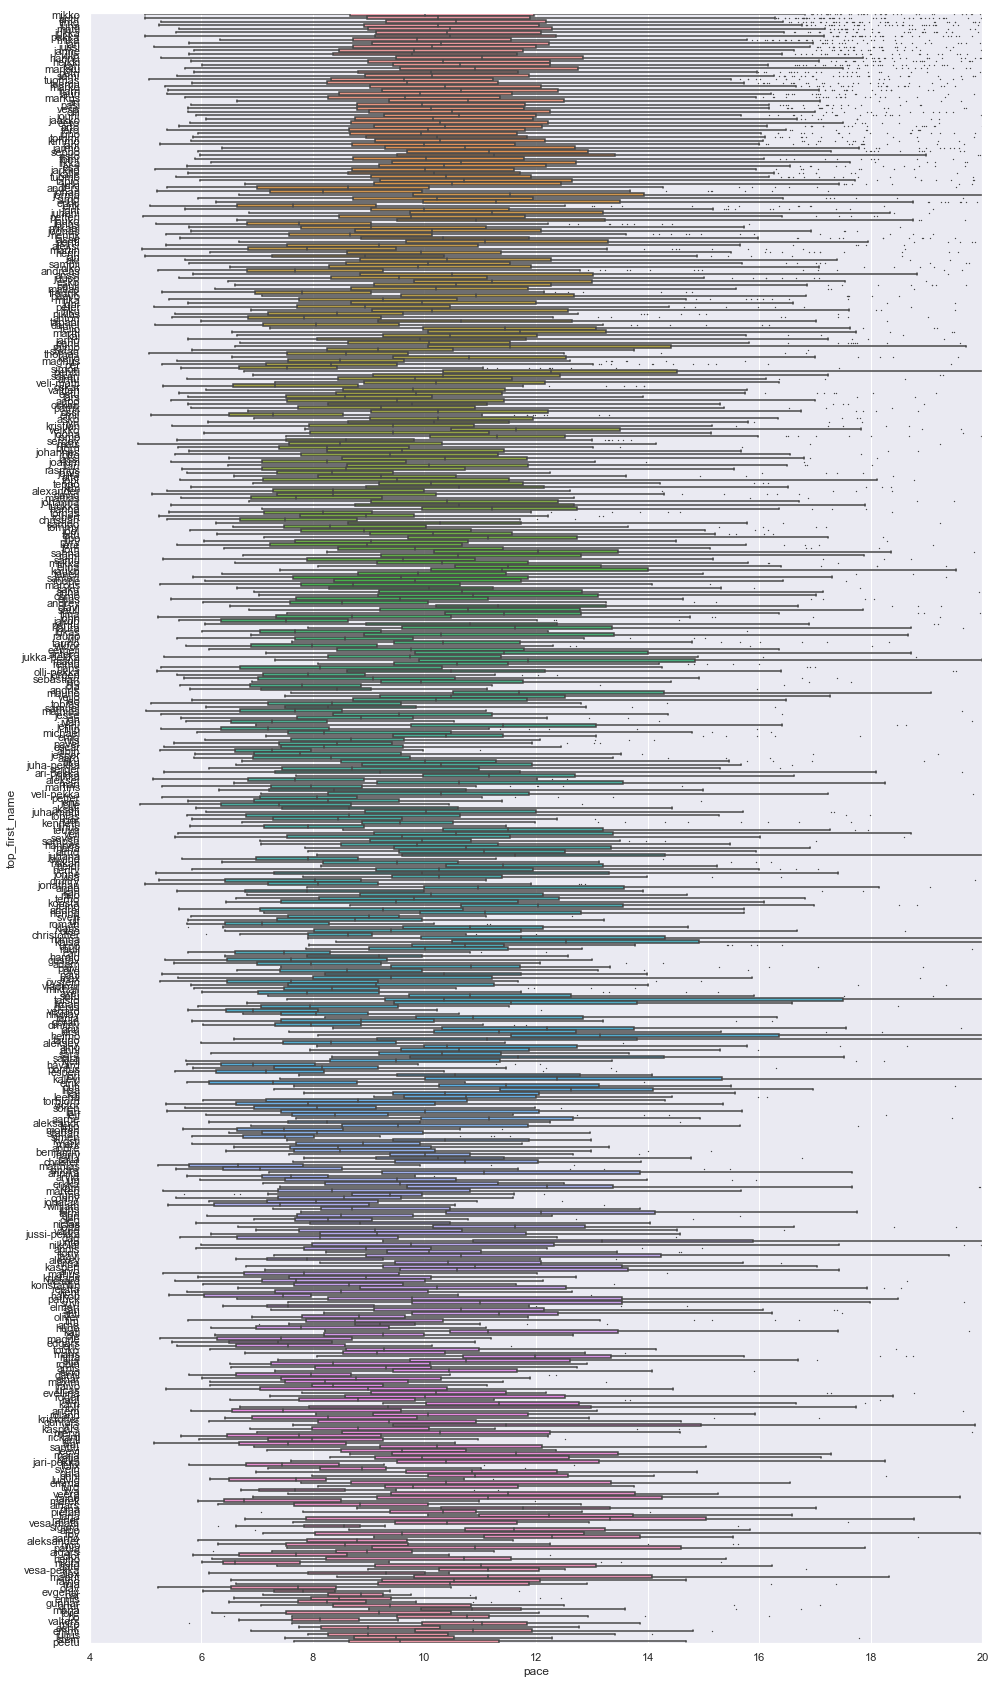

In [15]:
#g = sns.FacetGrid(runs, hue="top_first_name", height=8, aspect=2, xlim=(5,20), margin_titles=True) # no facet here
#g.map(sns.distplot, "pace", hist=False).add_legend()
plt.figure(figsize=(16, 30))
ax_names = sns.boxplot(y="top_first_name", x="pace", data=runs, fliersize=0.5, order=top_counts.index.tolist())
ax_names.set_xlim(4, 20)

In [16]:
team_country_counts = runs["team_country"].value_counts()
team_country_top_counts = team_country_counts[team_country_counts > 20]

runs["top_team_country"] = runs["team_country"]

def top_country(team_country): 
    if team_country in team_country_top_counts:
        return team_country
    else:
        return  "OTHER"
    
runs["top_team_country"] = runs.apply(lambda run: top_country(run["team_country"]), axis=1)
#g.map(sns.regplot, "team_id", "pace", scatter_kws={'alpha':0.1}, order=2).add_legend()


(4, 20)

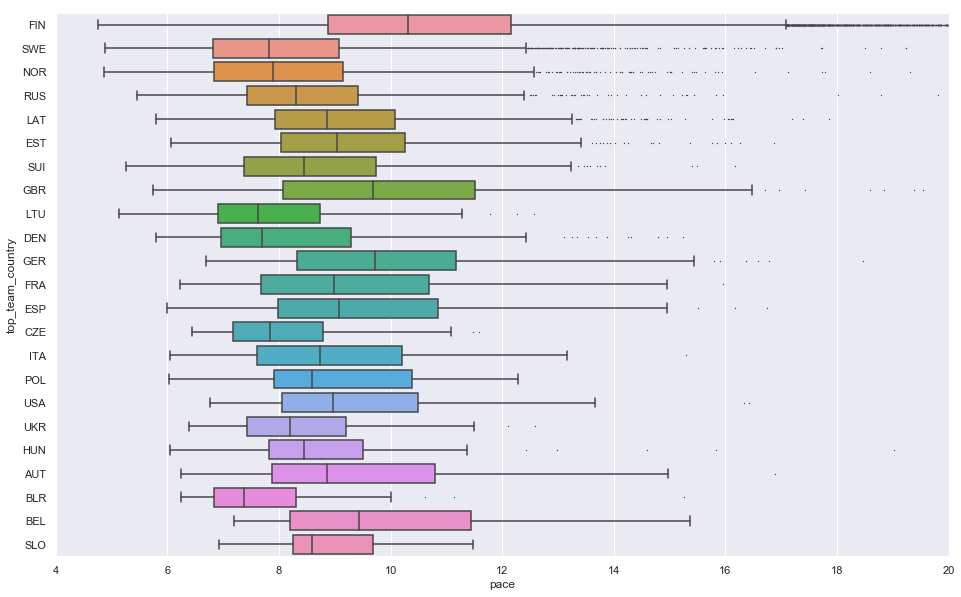

In [17]:
plt.figure(figsize=(16, 10))
ax_names = sns.boxplot(y="top_team_country", x="pace", data=runs, fliersize=0.5, order=team_country_top_counts.index.tolist())
ax_names.set_xlim(4, 20)

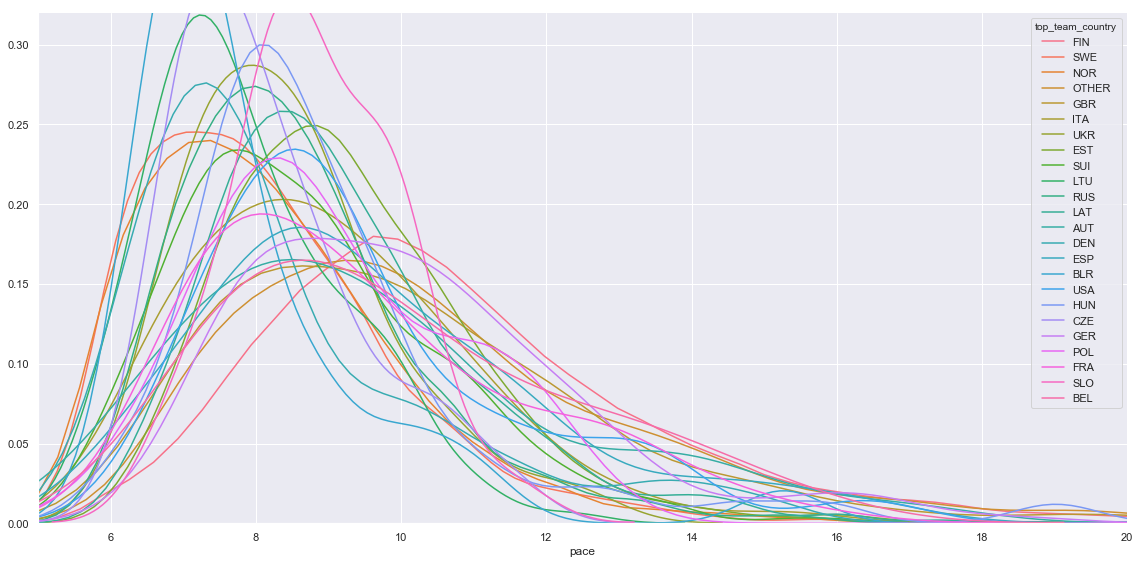

In [18]:
g = sns.FacetGrid(runs, hue="top_team_country", height=8, aspect=2, xlim=(5,20), ylim=(0,0.5), margin_titles=True, legend_out=False) # no facet here
g.map(sns.distplot, "pace", hist=False).add_legend()

In [19]:
runs
runs = runs.assign(team_id_log=np.log(runs.team_id))
runs = runs.assign(team_id_log10=np.log10(runs.team_id))
runs = runs.assign(team_id_square=np.square(runs.team_id))

first_names = pd.get_dummies(runs[["top_first_name", "leg_id", "num_runs", "top_team_country"]])
first_names[["team_id_log", "team_id_log10", "team_id_square"]] = runs[["team_id_log", "team_id_log10", "team_id_square"]]
first_names.insert(0, "team_id", runs["team_id"])

import json
with open(f"data/unknown_runners_feature_columns.json", 'w') as outfile:
    json.dump(first_names.columns.tolist(), outfile)

x = first_names.values
y = runs.pace.values

y = y.reshape(len(y), 1)

In [20]:
x.shape

(76531, 498)

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2019)

In [22]:
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)

(51275, 498)

(51275, 1)

(25256, 498)

In [23]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#first_names.columns.shape
#regr.coef_[0].shape
coefs = pd.DataFrame({'feature':first_names.columns, 'coef':regr.coef_[0]})
coefs['feature'] = coefs['feature'].str.replace('top_first_name_','')
display(coefs.sort_values(by="coef").head(20))
display(coefs.sort_values(by="coef", ascending=False).head(20))

feature          coef
495     team_id_log -2.116784e+06
454        leg_id_1 -4.341414e+05
460        leg_id_7 -4.341411e+05
455        leg_id_2 -4.341409e+05
456        leg_id_3 -4.341408e+05
459        leg_id_6 -4.341403e+05
457        leg_id_4 -4.341399e+05
458        leg_id_5 -4.341396e+05
497  team_id_square -1.335457e-06
0           team_id  4.720403e-03
130            ilya  2.314093e+03
15           akseli  2.314137e+03
272            nico  2.314242e+03
287          oliver  2.314257e+03
87             emmi  2.314289e+03
72           edgars  2.314305e+03
283            olav  2.314359e+03
29            andre  2.314386e+03
56         benjamin  2.314441e+03
260         michael  2.314448e+03

feature          coef
496           team_id_log10  4.874077e+06
463             num_runs_13  1.815664e+05
461              num_runs_1  1.815656e+05
464              num_runs_2  1.815655e+05
465              num_runs_3  1.815653e+05
466              num_runs_4  1.815652e+05
467              num_runs_5  1.815650e+05
468              num_runs_6  1.815649e+05
469              num_runs_7  1.815649e+05
470              num_runs_8  1.815648e+05
462             num_runs_10  1.815635e+05
487  top_team_country_OTHER  9.476336e+04
478    top_team_country_FIN  9.476334e+04
471    top_team_country_AUT  9.476315e+04
480    top_team_country_GBR  9.476282e+04
484    top_team_country_LAT  9.476273e+04
488    top_team_country_POL  9.476268e+04
476    top_team_country_ESP  9.476264e+04
477    top_team_country_EST  9.476262e+04
489    top_team_country_RUS  9.476257e+04

In [25]:
# Make predictions using the testing set
y_pred = regr.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_pred))
y_pred

# Simple linear: Mean squared error: 6.44 Explained variance score: 0.30
# log + square = Mean squared error: 6.21 Explained variance score: 0.320
# 100 first names + leg_id = Mean squared error: 7.842 Explained variance score: 0.101
# 452 first names + leg_id + log + square = Mean squared error: 5.387 Explained variance score: 0.382

Mean squared error: 5.362
Explained variance score: 0.396


array([[11.39571973],
       [11.38781529],
       [13.43679291],
       ...,
       [ 9.72455414],
       [10.52144739],
       [12.71213893]])

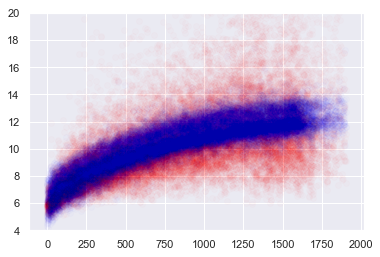

In [26]:
# plot it as in the example at http://scikit-learn.org/
plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
plt.scatter(x_test[:,0], y_pred, color='blue', alpha=0.01)
plt.ylim(4, 20)
plt.show()

In [27]:
%%time
rf = RandomForestRegressor(n_estimators=500, random_state=0, verbose=1, n_jobs=-1,
                          max_depth= 31, 
                           max_features="auto", 
                           max_leaf_nodes= 187, 
                           min_impurity_decrease= 0.00026892804687183225, 
                           min_samples_leaf= 0.0027584156528699683, 
                           min_samples_split= 21, 
                           min_weight_fraction_leaf= 0.00837)
rf.fit(x_train, y_train.ravel())
# Make predictions using the testing set
rf_y_pred = rf.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, rf_y_pred))
# Explained variance score: 1 is perfect prediction
print("Explained variance score: %.3f" % r2_score(y_test, rf_y_pred))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  6.0min finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:    0.1s


Mean squared error: 5.187
Explained variance score: 0.416
CPU times: user 44min 54s, sys: 1min 7s, total: 46min 1s
Wall time: 5min 58s


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 500 out of 500 | elapsed:    0.3s finished


In [28]:
%%time
import sklearn
gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=110,
                                                 criterion='friedman_mse', 
             learning_rate=0.10927990420965396, loss='ls', max_depth=1,
             max_features='auto', max_leaf_nodes=156,
             min_impurity_decrease=0.0, 
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, 
             random_state=0,
             subsample=0.8209381840043655, 
             verbose=1)
#gbr = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3100, random_state=0, verbose=1,  max_features="log2")

gbr.fit(x_train, y_train.ravel())
y_gbr_pred = gbr.predict(x_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_gbr_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_gbr_pred))

#print(f"feature_importances_: {gbr.feature_importances_}")
gbr_features = pd.DataFrame({'feature':first_names.columns, 'importance': gbr.feature_importances_})
gbr_features['feature'] = gbr_features['feature'].str.replace('top_first_name_','')
display(gbr_features.sort_values(by="importance", ascending=False))

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           8.2501           0.5536            1.55m
         2           7.8540           0.4330            1.63m
         3           7.4243           0.3846            1.59m
         4           7.2484           0.2939            1.52m
         5           6.9579           0.2276            1.50m
         6           6.7143           0.2202            1.50m
         7           6.5677           0.1706            1.49m
         8           6.3758           0.1522            1.48m
         9           6.3266           0.1144            1.47m
        10           6.1123           0.1071            1.45m
        20           5.5423           0.0404            1.27m
        30           5.3911           0.0167            1.12m
        40           5.2842           0.0087           57.96s
        50           5.2159           0.0057           49.09s
        60           5.2117           0.0027           40.52s
       

feature  importance
0                   team_id    0.380281
497          team_id_square    0.236865
495             team_id_log    0.073527
496           team_id_log10    0.069974
478    top_team_country_FIN    0.067037
458                leg_id_5    0.062106
457                leg_id_4    0.034597
454                leg_id_1    0.017807
461              num_runs_1    0.009748
459                leg_id_6    0.008632
460                leg_id_7    0.006462
487  top_team_country_OTHER    0.005617
114                   heimo    0.003915
468              num_runs_6    0.002783
464              num_runs_2    0.002652
314                  pentti    0.002036
165                   jorma    0.001939
492    top_team_country_SWE    0.001547
346                   risto    0.001539
52                     arvo    0.001531
469              num_runs_7    0.001335
91                    erkki    0.001081
255                   mauri    0.000832
465              num_runs_3    0.000729
442              vesa-pekka    0.000552
107                   hannu    0.000463
166                   jouko    0.000442
391                  taisto    0.000436
466              num_runs_4    0.000433
429                    unto    0.000399
..                      ...         ...
159                jonathan    0.000000
160                    joni    0.000000
178                   juris    0.000000
190                    kari    0.000000
189                   kalle    0.000000
188                  kalevi    0.000000
187                     kaj    0.000000
186                   kaisa    0.000000
185                     kai    0.000000
184                  jörgen    0.000000
183                   jyrki    0.000000
182                    jyri    0.000000
181                   juuso    0.000000
180             jussi-pekka    0.000000
179                   jussi    0.000000
177                    juri    0.000000
161                   jonne    0.000000
176                  julius    0.000000
175             jukka-pekka    0.000000
174                   jukka    0.000000
173                    juho    0.000000
172                  juhani    0.000000
171                  juhana    0.000000
170              juha-pekka    0.000000
169              juha-matti    0.000000
168                    juha    0.000000
167                   jouni    0.000000
163                  joonas    0.000000
162                   joona    0.000000
249                  matias    0.000000

[498 rows x 2 columns]

CPU times: user 1min 26s, sys: 570 ms, total: 1min 26s
Wall time: 1min 27s


In [29]:
from time import time
from scipy.stats import randint as sp_randint
from scipy.stats import uniform
from scipy.stats import norm

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.4f} (std: {1:.4f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")




In [30]:
import sklearn
#specify parameters and distributions to sample from
crf = sklearn.ensemble.GradientBoostingRegressor(n_estimators=3000, 
                                                 random_state=0, 
                                                 verbose=1, 
                                                 n_iter_no_change=100, tol=0.000001)

param_dist_gbr = { 
    "max_leaf_nodes": np.rint(np.abs(norm.rvs(loc=156, scale=10, size=1000))).astype("int"), 
    "max_depth": np.rint(np.abs(norm.rvs(loc=1, scale=1, size=1000))).astype("int"), 
    "max_features": ["auto", "sqrt"], 
    "learning_rate": np.abs(norm.rvs(loc=0.11, scale=0.01, size=1000)), 
    "subsample": np.abs(norm.rvs(loc=0.83, scale=0.1, size=1000)) }

n_iter_search = 5 
random_search = RandomizedSearchCV(crf, param_distributions=param_dist_gbr, random_state=2019, 
                                   n_iter=n_iter_search, cv=3, n_jobs=-1, error_score=0, verbose=1)

start = time() 
random_search.fit(x_train, y_train.ravel()) 
print("RandomizedSearchCV took %.2f seconds for %d candidates" " parameter settings." % ((time() - start), n_iter_search)) 
report(random_search.cv_results_) 
print(random_search.best_estimator_)



Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:  4.0min remaining:  3.5min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 10.0min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           8.2628           0.5236           34.37m
         2           7.9066           0.4255           33.95m
         3           7.4887           0.3523           34.11m
         4           7.2198           0.3018           34.82m
         5           6.8688           0.2462           35.02m
         6           6.7740           0.1943           34.89m
         7           6.5759           0.1719           35.10m
         8           6.3551           0.1461           35.33m
         9           6.3340           0.1247           35.35m
        10           6.2399           0.1017           35.43m
        20           5.5954           0.0370           34.98m
        30           5.4629           0.0127           34.43m
        40           5.2945           0.0088           33.81m
        50           5.2886           0.0045           33.54m
        60           5.1802           0.0023           33.08m
       

In [31]:
crf_y_pred = random_search.predict(x_test)

print("Mean squared error: %.3f"
      % mean_squared_error(y_test, crf_y_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, crf_y_pred))
r2 = r2_score(y_test, crf_y_pred)

with open(f"data/rf-best_estimator_{r2:.3f}.json", 'w') as outfile:
    outfile.write(str(random_search.best_estimator_.get_params()))

Mean squared error: 5.018
Explained variance score: 0.435


In [32]:
# plot it as in the example at http://scikit-learn.org/
#plt.scatter(x_test[:,0], y_test,  color='red', alpha=0.01)
#plt.scatter(x_test[:,0], rf_y_pred, color='blue', alpha=0.01)
#plt.ylim(4, 20)
#plt.show()

In [33]:
#svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1)
#y_rbf_pred = svr_rbf.fit(x_train, y_train.ravel()).predict(x_test)
#print("Mean squared error: %.3f"
#      % mean_squared_error(y_test, y_rbf_pred))
# Explained variance score: 1 is perfect prediction
#print('Explained variance score: %.3f' % r2_score(y_test, y_rbf_pred))


In [34]:
br = linear_model.BayesianRidge()
br.fit(x_train, y_train.ravel())
y_br_pred = br.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_br_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_br_pred))




Mean squared error: 5.338
Explained variance score: 0.399


In [35]:
# Robustly fit linear model with RANSAC algorithm
ransac = linear_model.RANSACRegressor()
ransac.fit(x_train, y_train.ravel())
y_ransac_pred = ransac.predict(x_test)
print("Mean squared error: %.3f"
      % mean_squared_error(y_test, y_ransac_pred))
# Explained variance score: 1 is perfect prediction
print('Explained variance score: %.3f' % r2_score(y_test, y_ransac_pred))


Mean squared error: 6.695
Explained variance score: 0.246


In [36]:
np.log2(17)

4.087462841250339